In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline


np.random.seed(42)

n = 100
study_hours = np.random.randint(0, 10, n)
sleep_hours = np.random.randint(4, 10, n)

# Simple rule: Pass if study_hours*2 + sleep_hours > 15
result = ["Pass" if (study_hours[i]*2 + sleep_hours[i] > 15) else "Fail" for i in range(n)]

df = pd.DataFrame({
    "StudyHours": study_hours,
    "SleepHours": sleep_hours,
    "Result": result
})

file_path = "C:\\Users\\anjali gaikwad\\OneDrive\\Documents\\Student_Details.csv"
df.to_csv(file_path, index=False)

file_path


'C:\\Users\\anjali gaikwad\\OneDrive\\Documents\\Student_Details.csv'

In [31]:
wine=pd.read_csv("C:\\Users\\anjali gaikwad\\OneDrive\\Documents\\Student_Details.csv")
print(wine.head(10))

   StudyHours  SleepHours Result
0           6           7   Pass
1           3           5   Fail
2           7           4   Pass
3           4           9   Pass
4           6           8   Pass
5           9           6   Pass
6           2           7   Fail
7           6           9   Pass
8           7           6   Pass
9           4           6   Fail


In [32]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudyHours  100 non-null    int64 
 1   SleepHours  100 non-null    int64 
 2   Result      100 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [33]:
wine.isnull().sum()

StudyHours    0
SleepHours    0
Result        0
dtype: int64

In [34]:
bins = [0, 4, 10]
group_names = ['LowStudy', 'HighStudy']

wine['StudyLevel'] = pd.cut(wine['StudyHours'], bins=bins, labels=group_names)
wine['StudyLevel'].unique()

['HighStudy', 'LowStudy', NaN]
Categories (2, object): ['LowStudy' < 'HighStudy']

In [35]:
print(wine)

    StudyHours  SleepHours Result StudyLevel
0            6           7   Pass  HighStudy
1            3           5   Fail   LowStudy
2            7           4   Pass  HighStudy
3            4           9   Pass   LowStudy
4            6           8   Pass  HighStudy
..         ...         ...    ...        ...
95           9           4   Pass  HighStudy
96           8           6   Pass  HighStudy
97           6           4   Pass  HighStudy
98           8           5   Pass  HighStudy
99           7           5   Pass  HighStudy

[100 rows x 4 columns]


In [36]:
wine['StudyLevel'].value_counts(dropna=False)

StudyLevel
HighStudy    55
LowStudy     38
NaN           7
Name: count, dtype: int64

In [37]:
wine['StudyLevel'].value_counts()

StudyLevel
HighStudy    55
LowStudy     38
Name: count, dtype: int64

<Axes: xlabel='StudyLevel', ylabel='count'>

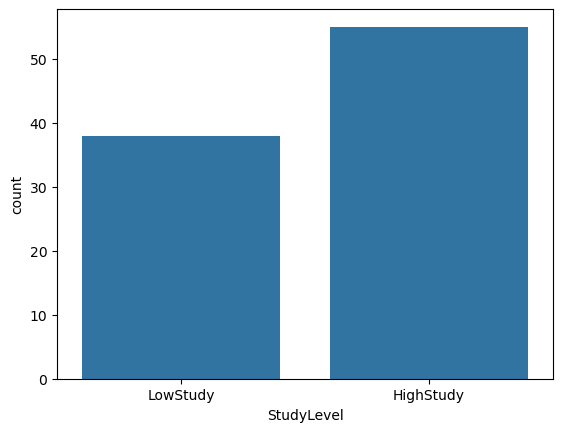

In [38]:
sns.countplot(x='StudyLevel', data=wine)

In [39]:
X = wine.drop('StudyLevel', axis=1)
y = wine['StudyLevel']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X = wine[['StudyHours', 'SleepHours']]   # numeric only
y = wine['Result']  

In [42]:
le = LabelEncoder()
y = le.fit_transform(y)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [44]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)

In [46]:
pred_rfc[:10]

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [47]:
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[ 8  0]
 [ 0 12]]


In [51]:
#SVM Classifier

clf=SVC()
clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)

In [52]:
#let's see how our model performed
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[ 8  0]
 [ 0 12]]


In [53]:
'''SVM (Support Vector Machine)
Finds the best separating hyperplane.
Maximizes the margin between classes.
Works best on clean, small-to-medium datasets.

Random Forest
A collection of many decision trees (ensemble).
Uses majority voting for classification.
Handles large and messy datasets very well.'''

'SVM (Support Vector Machine)\nFinds the best separating hyperplane.\nMaximizes the margin between classes.\nWorks best on clean, small-to-medium datasets.\n\nRandom Forest\nA collection of many decision trees (ensemble).\nUses majority voting for classification.\nHandles large and messy datasets very well.'

In [56]:
#neural network
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc=mlpc.predict(X_test)

In [57]:
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[ 8  0]
 [ 0 12]]


In [59]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred_rfc)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [60]:
wine.head()

,StudyHours,SleepHours,Result,StudyLevel
0,6,7,Pass,HighStudy
1,3,5,Fail,LowStudy
2,7,4,Pass,HighStudy
3,4,9,Pass,LowStudy
4,6,8,Pass,HighStudy


In [61]:
new_students = np.array([[6, 7],   # Student 1: 6 hours study, 7 hours sleep
                         [3, 5]])

In [62]:
new_students_scaled = sc.transform(new_students)


C:\Users\anjali gaikwad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [67]:
pred_rfc_new = rfc.predict(new_students_scaled)
print("Random Forest Predictions:", pred_rfc_new)


Random Forest Predictions: [1 0]


In [69]:
pred_rfc_labels = le.inverse_transform([1, 0]) 
print(pred_rfc_labels)


['Pass' 'Fail']
